<a href="https://colab.research.google.com/github/Ebratul/Olympic/blob/main/All_time_Olympic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/athlete_events.csv')
region_df = pd.read_csv('/content/drive/MyDrive/dataset/noc_regions.csv')

In [ ]:
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
91127,46190,Tora L. Harris,M,25.0,190.0,81.0,United States,USA,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's High Jump,NaN
234990,117843,Robert Blyth Tait,M,31.0,163.0,63.0,New Zealand,NZL,1992 Summer,1992,Summer,Barcelona,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",Silver
35067,18062,"Deborah ""Debbie"" Capozzi",F,31.0,163.0,64.0,United States,USA,2012 Summer,2012,Summer,London,Sailing,Sailing Women's Three Person Keelboat,NaN
62411,31964,Muhammad Rifaat Mustafa El-Fanaguili,M,28.0,NaN,NaN,Egypt,EGY,1964 Summer,1964,Summer,Tokyo,Football,Football Men's Football,NaN
174598,87704,Saori Obata,F,26.0,167.0,56.0,Japan,JPN,2004 Summer,2004,Summer,Athina,Tennis,Tennis Women's Singles,NaN


In [ ]:
df.shape

(271116, 15)

In [ ]:
df['Season'].value_counts()

,count
Season,
Summer,222552
Winter,48564


In [ ]:
df = df[df['Season'] == 'Summer']
df.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
134641,67749,Alexandra Ledermann,F,27.0,171.0,57.0,France,FRA,1996 Summer,1996,Summer,Atlanta,Equestrianism,"Equestrianism Mixed Jumping, Team",NaN
13313,7226,Hugo Balduino de Sousa,M,29.0,187.0,74.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,NaN
116769,59085,Khaliuny Boldbaatar,M,20.0,NaN,NaN,Mongolia,MGL,1992 Summer,1992,Summer,Barcelona,Judo,Judo Men's Lightweight,NaN
248439,124365,"Cornelis Huig Jan ""Jan-Cor"" van der Greef",M,22.0,190.0,83.0,Netherlands,NED,2004 Summer,2004,Summer,Athina,Shooting,Shooting Men's Skeet,NaN
30765,15849,"Pieter Johannes ""Jan"" Brussaard",M,45.0,NaN,NaN,Netherlands,NED,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Military Rifle, Prone, 600 metr...",NaN


In [ ]:
region_df.sample(5)

,NOC,region,notes
195,SYR,Syria,NaN
135,MLT,Malta,NaN
23,BIH,Bosnia and Herzegovina,NaN
123,MAD,Madagascar,NaN
104,JPN,Japan,NaN


In [ ]:
df = df.merge(region_df, on = 'NOC', how = 'left')

In [ ]:
df.sample(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
137495,83848,Alwyn Abraham Myburgh,M,27.0,188.0,71.0,South Africa,RSA,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,South Africa,NaN
186178,113912,Mark Andrew Spitz,M,22.0,183.0,73.0,United States,USA,1972 Summer,1972,Summer,Munich,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
180310,110238,Adalberto Siebens,M,21.0,163.0,63.0,Puerto Rico,PUR,1968 Summer,1968,Summer,Mexico City,Boxing,Boxing Men's Light-Welterweight,NaN,Puerto Rico,NaN
221008,134610,Zhang Yousheng,M,27.0,196.0,85.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Volleyball,Volleyball Men's Volleyball,NaN,China,NaN


In [ ]:
df['region'].unique().shape

(206,)

In [ ]:
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9189
Height,51857
Weight,53854
Team,0
NOC,0
Games,0
Year,0


In [ ]:
df.duplicated().sum()

np.int64(1385)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df['Medal'].value_counts()

,count
Medal,
Gold,11456
Bronze,11409
Silver,11212


In [ ]:
df = pd.concat([df,pd.get_dummies(df['Medal'])], axis=1)

In [ ]:
df.sample(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
79006,48226,Francis Hervieu,M,24.0,175.0,76.0,France,FRA,1980 Summer,1980,Summer,Moskva,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",NaN,France,NaN,False,False,False
56665,34632,Cherrelle Fennell,F,17.0,157.0,52.0,Great Britain,GBR,2004 Summer,2004,Summer,Athina,Gymnastics,Gymnastics Women's Floor Exercise,NaN,UK,NaN,False,False,False
201135,122673,Frank Sima Turay Tucker,M,19.0,180.0,93.0,Sierra Leone,SLE,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,Sierra Leone,NaN,False,False,False
189787,116010,David Philip Sturge,M,28.0,194.0,87.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Men's Coxless Pairs,NaN,UK,NaN,False,False,False


In [ ]:
df.groupby('NOC')[['Bronze', 'Gold', 'Silver']].sum().sort_values('Gold', ascending=False).reset_index()


,NOC,Bronze,Gold,Silver
0,USA,1197,2472,1333
1,URS,596,832,635
2,GBR,620,635,729
3,GER,649,592,538
4,ITA,454,518,474
...,...,...,...,...
225,WIF,5,0,0
226,YEM,0,0,0
227,YAR,0,0,0
228,YMD,0,0,0


In [ ]:
medel_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [ ]:
medel_tally = medel_tally.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()

In [ ]:
medel_tally['total'] = medel_tally['Gold'] + medel_tally['Silver'] + medel_tally['Bronze']

In [ ]:
medel_tally['Total'] = medel_tally['Gold'] + medel_tally['Silver'] + medel_tally['Bronze']
medel_tally

,NOC,Gold,Silver,Bronze,total,Total
0,USA,1035,802,708,2545,2545
1,URS,394,317,294,1005,1005
2,GBR,278,317,300,895,895
3,GER,235,261,283,779,779
4,FRA,234,256,287,777,777
...,...,...,...,...,...,...
225,WIF,0,0,2,2,2
226,YEM,0,0,0,0,0
227,YAR,0,0,0,0,0
228,YMD,0,0,0,0,0


In [ ]:
medel_tally.sample(4)

,NOC,Gold,Silver,Bronze,total,Total
59,MAR,6,5,12,23,23
8,GDR,153,129,127,409,409
219,TGA,0,1,0,1,1
186,KSA,0,1,2,3,3


In [ ]:
medel_tally[medel_tally['NOC'] == 'BAN']

,NOC,Gold,Silver,Bronze,total,Total
136,BAN,0,0,0,0,0


In [ ]:
years =  df['Year'].unique().tolist()

In [ ]:
years.sort()
years.insert(0, 'Overall')

In [ ]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [ ]:
conutry =  df['region'].unique().tolist()

In [ ]:
country = np.unique(df['region'].dropna().values.tolist()).tolist()

In [ ]:
country.sort()

In [ ]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [ ]:
country.insert(0, 'Country')

In [ ]:
country

['Country',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [ ]:
def fatch_medal_tally(df,year, country):
  medel_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
  flag = 0
  if year == 'Overall' and country == 'Overall':
    temp_df = df
  if year == 'Overall' and country != 'Overall':
    flag = 1
    temp_df = medel_df[medel_df['region'] == country]
  if year != 'Overall' and country == 'Overall':
    temp_df = medel_df[medel_df['Year'] == year]
  if year != 'Overall' and country != 'Overall':
    temp_df = medel_df[(medel_df['Year'] == year) & (medel_df['region'] == country)]

  if flag == 1:
    x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year',ascending=True).reset_index()
  else:
    x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()
  x['total'] = x['Gold'] + x['Silver'] + x['Bronze']
  print(x)


In [ ]:
fatch_medal_tally(df,year = 'Overall', country = 'India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


In [ ]:
medel_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])


In [ ]:
medel_df[(medel_df['Year'] == 2016) & (medel_df['region'] == 'India')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
1015,663,Sharath Kamal Achanta,M,34.0,186.0,85.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN,False,False,False
7065,4523,Seema Antil,F,33.0,182.0,92.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Discus Throw,NaN,India,NaN,False,False,False
8713,5562,Aditi Ashok,F,18.0,173.0,57.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Women's Individual,NaN,India,NaN,False,False,False
9202,5868,Manu Attri,M,23.0,172.0,73.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Doubles,NaN,India,NaN,False,False,False
10070,6427,Lalita Shivaji Babar,F,27.0,166.0,50.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 3,000 metres Steeplechase",NaN,India,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182260,111467,Sathish Kumar Sivalingam,M,24.0,175.0,77.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Middleweight,NaN,India,NaN,False,False,False
195568,119515,Shiva Thapa,M,22.0,169.0,56.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Bantamweight,NaN,India,NaN,False,False,False
198042,120871,Sandeep Tomar,M,25.0,168.0,61.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,India,NaN,False,False,False
216942,132143,Vikas Krishan Yadav,M,24.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,India,NaN,False,False,False


# overall Analysis

In [ ]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False


In [ ]:
df['Year'].unique().shape[0] -1

28

In [ ]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [ ]:
df['Sport'].unique().shape[0]

52

In [ ]:
df['Event'].unique().shape[0]

651

In [ ]:
df['Name'].unique().shape

(116122,)

In [ ]:
df['region'].unique().shape

(206,)

In [ ]:
#graph plot
nation_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('Year')

In [ ]:
# nation_over_time

In [ ]:
nation_over_time.rename(columns={
    'Year': 'Edition',
    'count': 'No_of_Countries'
}, inplace=True)

In [ ]:
nation_over_time.head(2)

,Edition,No_of_Countries
28,1896,12
22,1900,31


In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(nation_over_time, x="Edition", y="No_of_Countries")
fig.show()

In [ ]:
event_over_time = df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('Year')

In [ ]:
event_over_time.rename(columns={
    'Year': 'Edition',
    'count': 'No_of_Events'
}, inplace=True)

In [ ]:
event_over_time.head(3)

,Edition,No_of_Events
28,1896,43
26,1900,90
25,1904,95


In [ ]:
fig = px.line(event_over_time, x = 'Edition', y = 'No_of_Events')
fig.show()

In [ ]:
athletes_over_time = df.drop_duplicates(['Year', 'Name'])['Year'].value_counts().reset_index().sort_values('Year')

In [ ]:
athletes_over_time.rename(columns={
    'Year' : 'Edition',
    'count' : 'No_of_Athletes'
}, inplace=True)


In [ ]:
fig = px.line(athletes_over_time, x = 'Edition', y = 'No_of_Athletes')
fig.show()

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

<Axes: xlabel='Year', ylabel='Sport'>

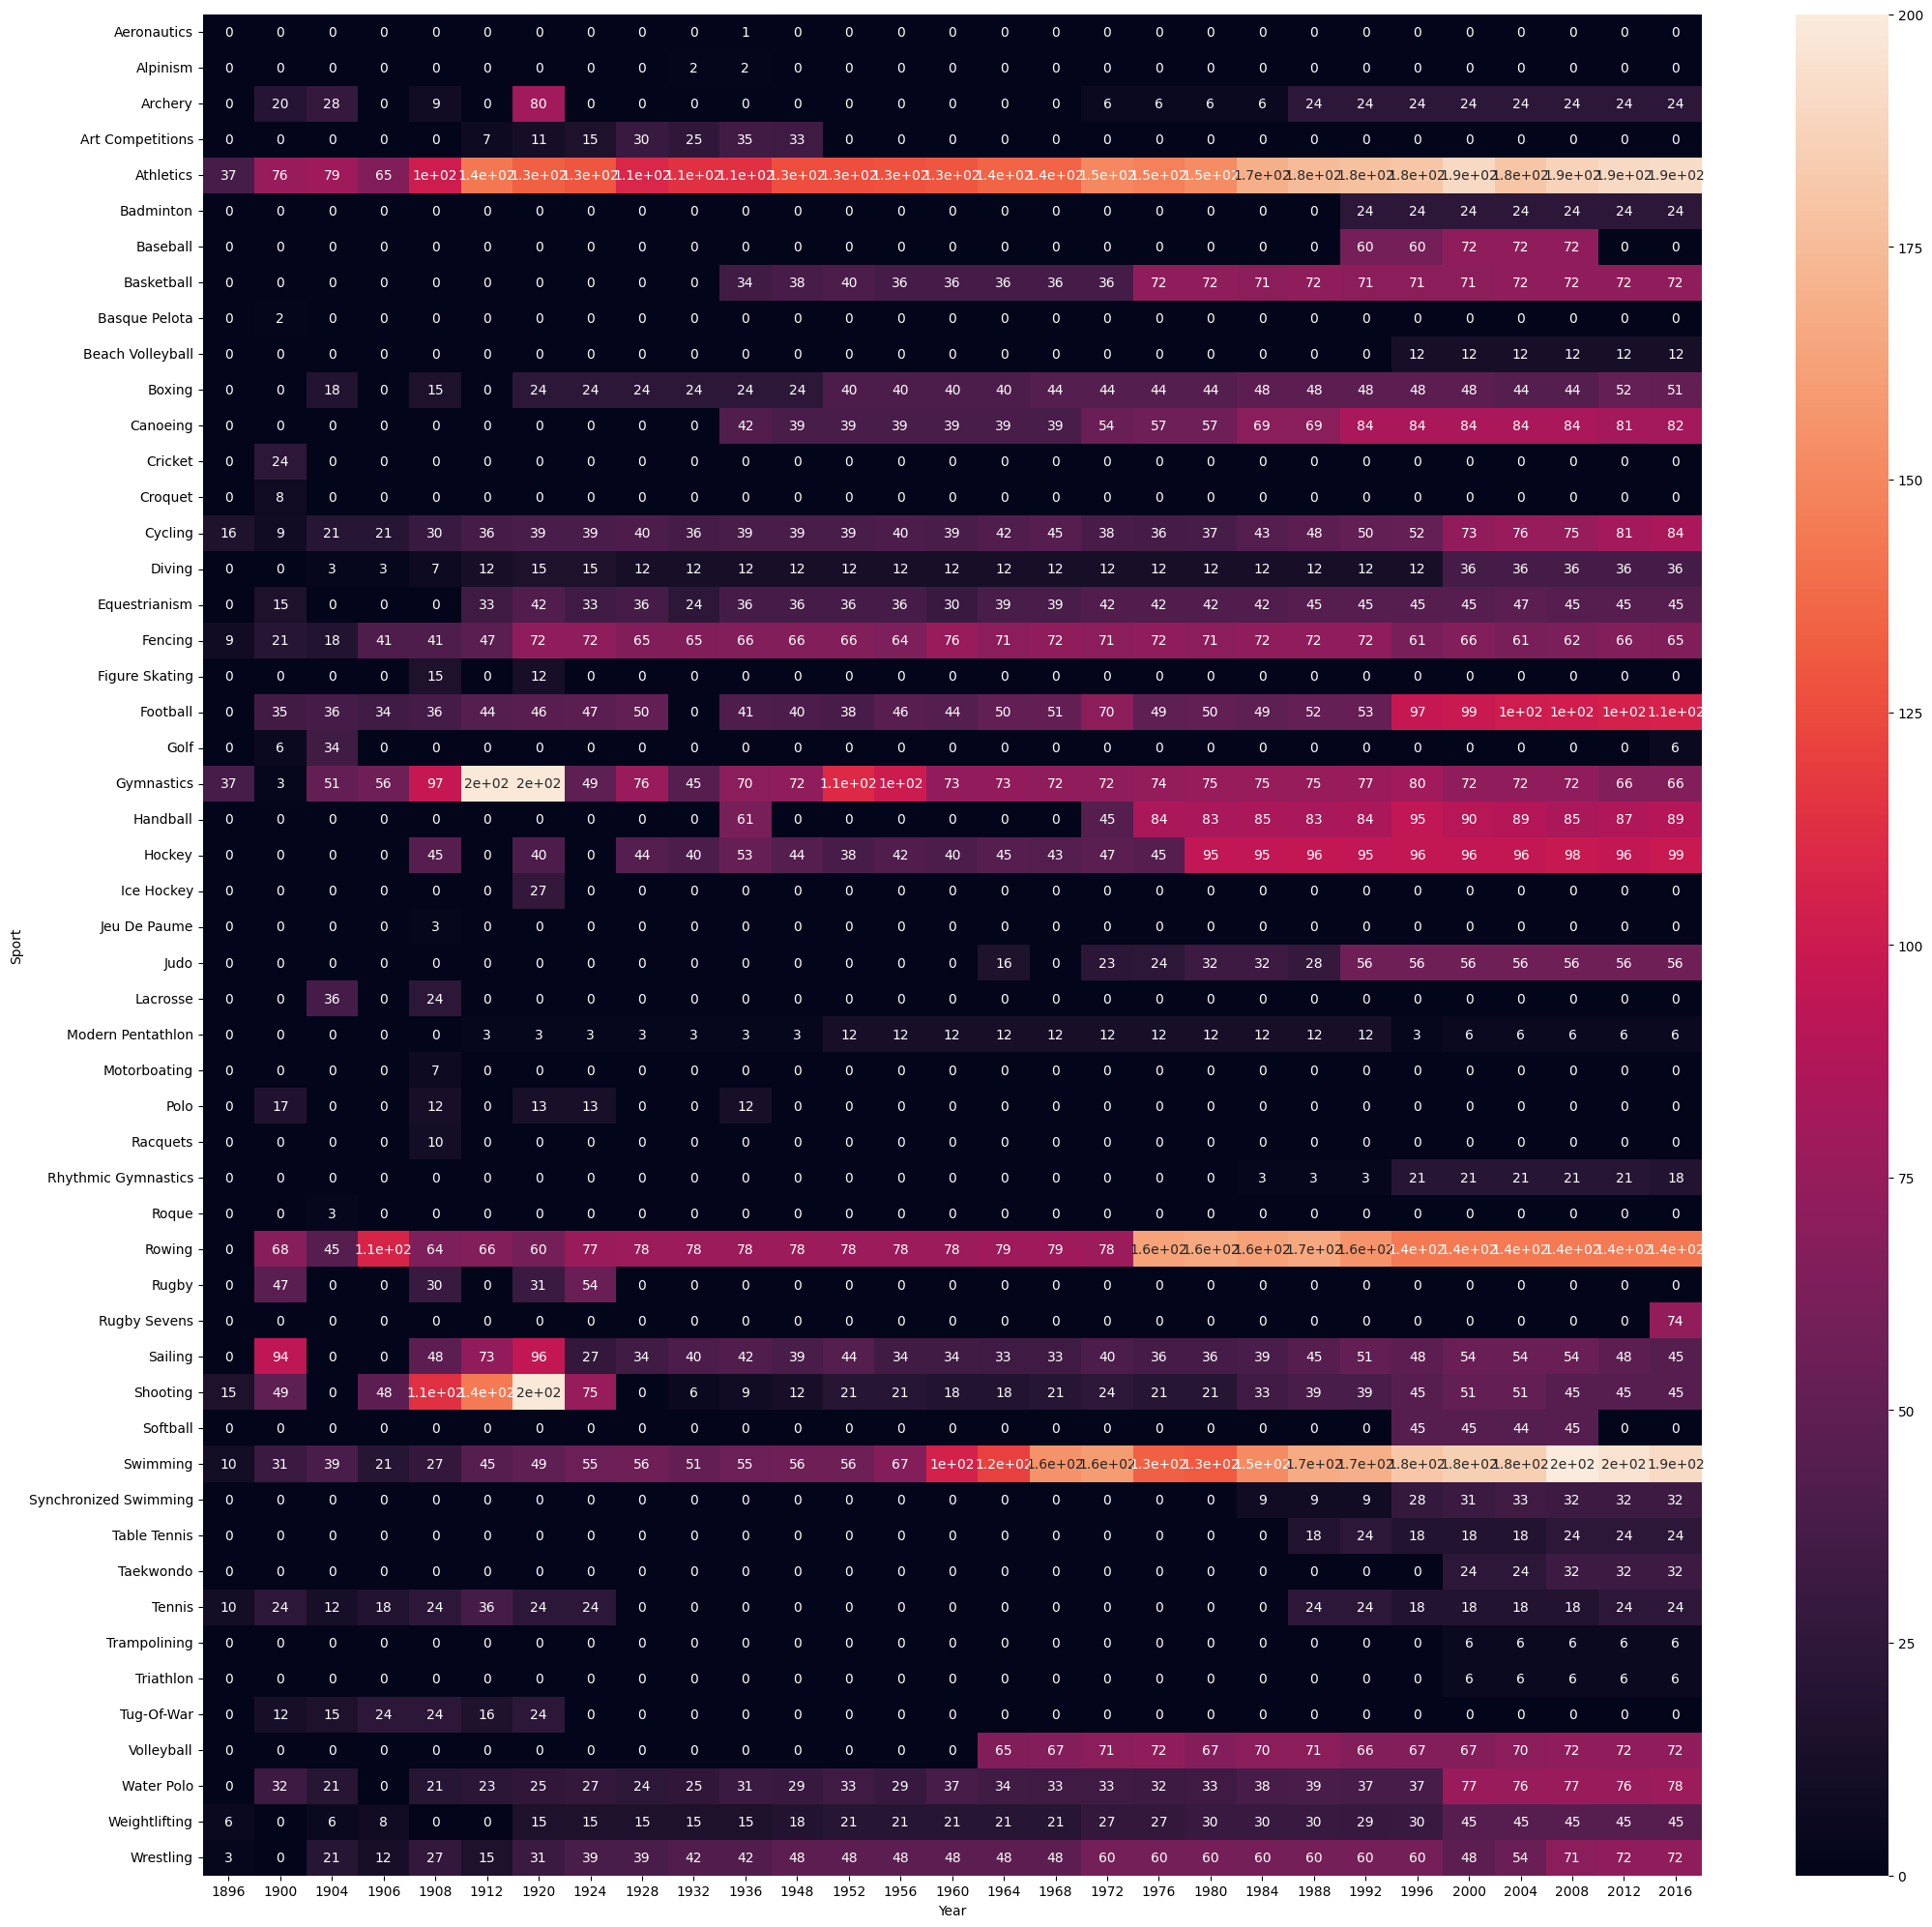

In [ ]:
plt.figure(figsize = (25,25))
sb.heatmap(df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0).astype('int'), annot=True)

In [ ]:
x = df.drop_duplicates(['Year', 'Sport', 'Event'])

In [ ]:
x.pivot_table(index = 'Sport', columns = 'Year', values = 'Event', aggfunc='count').fillna(0).astype('int')

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import seaborn as sb

<Axes: xlabel='Year', ylabel='Sport'>

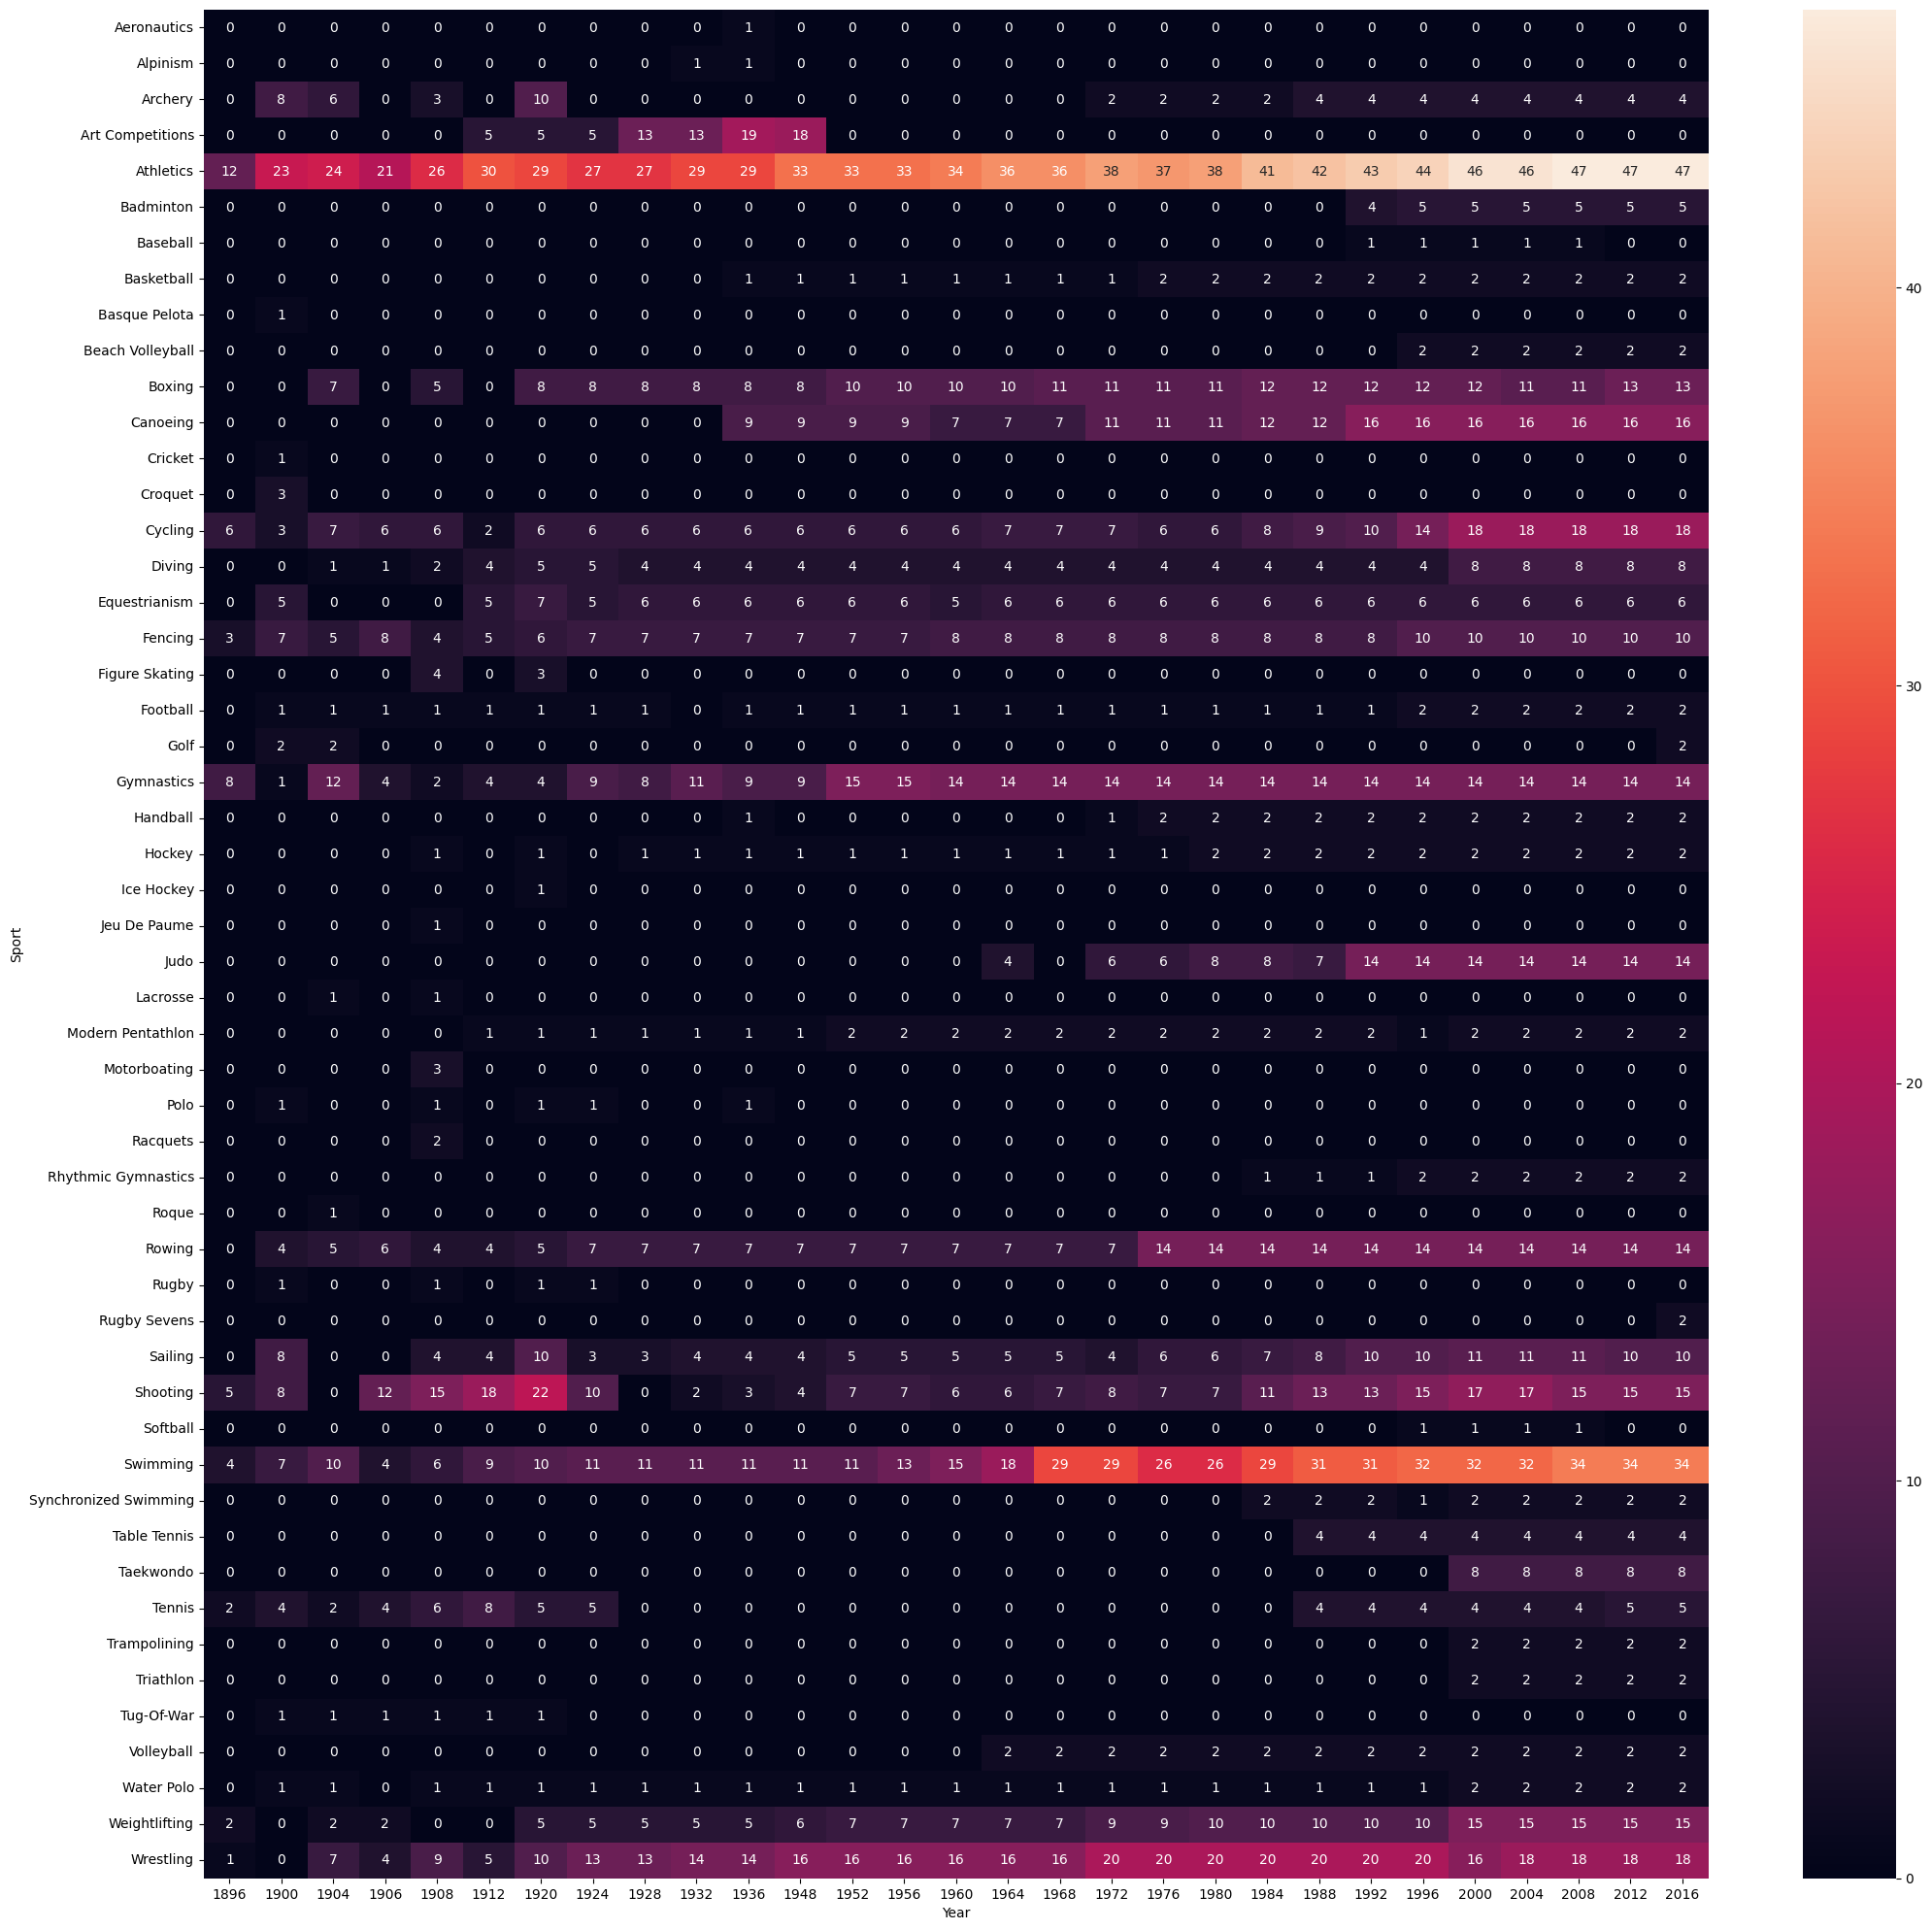

In [ ]:
plt.figure(figsize=(25,25))
sb.heatmap(x.pivot_table(index = 'Sport', columns = 'Year', values = 'Event', aggfunc='count').fillna(0).astype('int'), annot = True)

In [ ]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False


In [ ]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Bronze', 'Gold', 'Silver'],
      dtype='object')

In [ ]:
# Step 1: Medal থাকা rows
medal_df = df[df['Medal'].notna()]

# Step 2: প্রতিটি Athlete কত Medal জিতেছে
medal_count = (
    medal_df.groupby('Name')
            .size()
            .reset_index(name='Medal_Count')
            .sort_values('Medal_Count', ascending=False)
)

# Step 3: Medal count কে original df এর সাথে merge
merged = (
    medal_count.merge(
        df[['Name', 'Sport', 'region']].drop_duplicates('Name'),
        on='Name',
        how='left'
    )
)

# Step 4: শীর্ষ 4 Athlete দেখানো
merged.head(4)


,Name,Medal_Count,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
1,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
2,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
3,Edoardo Mangiarotti,13,Fencing,Italy


In [ ]:
# temp_df = df.dropna(subset=['Medal'])
# temp_df = temp_df[temp_df['Sport'] == 'Swimming']
# temp_df

In [ ]:
def most_successful(df, Sport):
  temp_df = df.dropna(subset=['Medal'])
  if Sport != 'Overall':
    temp_df = temp_df[temp_df['Sport'] == Sport]
  x = temp_df['Name'].value_counts().reset_index().head(10).merge(df, left_on = 'Name', right_on = 'Name', how = 'left')[['Name', 'count', 'Sport', 'region']].drop_duplicates('Name')
  x.rename(columns= {'count':'Medals'}, inplace= True)
  return x

In [ ]:
most_successful(df, 'Swimming')

,Name,Medals,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Ryan Steven Lochte,12,Swimming,USA
44,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
61,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
74,Natalie Anne Coughlin (-Hall),12,Swimming,USA
86,Mark Andrew Spitz,11,Swimming,USA
98,"Matthew Nicholas ""Matt"" Biondi",11,Swimming,USA
110,Franziska van Almsick,10,Swimming,Germany
133,"Gary Wayne Hall, Jr.",10,Swimming,USA
143,Aleksandr Vladimirovich Popov,9,Swimming,Russia


# Country wise
**country wise medal tally per year(line plot)**

**What countries are good at heatmap**

**Most successful Athletes(Top 10)**

In [ ]:
df.sample(6)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
38443,23630,Astrid Crabo (-Lundquist),F,25.0,NaN,NaN,Sweden-1,SWE,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Mixed Doubles,NaN,Sweden,NaN,False,False,False
36301,22350,Johannes Lodewyk Meyer Coleman,M,38.0,NaN,NaN,South Africa,RSA,1948 Summer,1948,Summer,London,Athletics,Athletics Men's Marathon,NaN,South Africa,NaN,False,False,False
54221,33159,Ahmed Eskandarpour,M,20.0,180.0,70.0,Iran,IRI,1976 Summer,1976,Summer,Montreal,Fencing,"Fencing Men's Sabre, Team",NaN,Iran,NaN,False,False,False
54926,33563,"John Onins Exley, Jr.",M,32.0,NaN,NaN,Vesper Boat Club,USA,1900 Summer,1900,Summer,Paris,Rowing,Rowing Men's Coxed Eights,Gold,USA,NaN,False,True,False
16143,10137,Tibor Benk (-Benk-Kzdivsrhelyi),M,27.0,180.0,NaN,Hungary,HUN,1932 Summer,1932,Summer,Los Angeles,Fencing,"Fencing Men's epee, Individual",NaN,Hungary,NaN,False,False,False
172550,105295,Daniel Sande,M,44.0,178.0,82.0,Argentina,ARG,1960 Summer,1960,Summer,Roma,Fencing,"Fencing Men's Sabre, Individual",NaN,Argentina,NaN,False,False,False


In [ ]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC','Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

/tmp/ipython-input-1322467760.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
temp_df.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
12,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,True,False,False
13,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,True,False,False
15,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,True,False,False


In [ ]:
new_df = temp_df[temp_df['region'] == 'Pakistan']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()
final_df.head(3)

,Year,Medal
0,1956,1
1,1960,2
2,1964,1


In [ ]:
fig = px.line(final_df, x = 'Year', y = 'Medal')
fig.show()

<Axes: xlabel='Year', ylabel='Sport'>

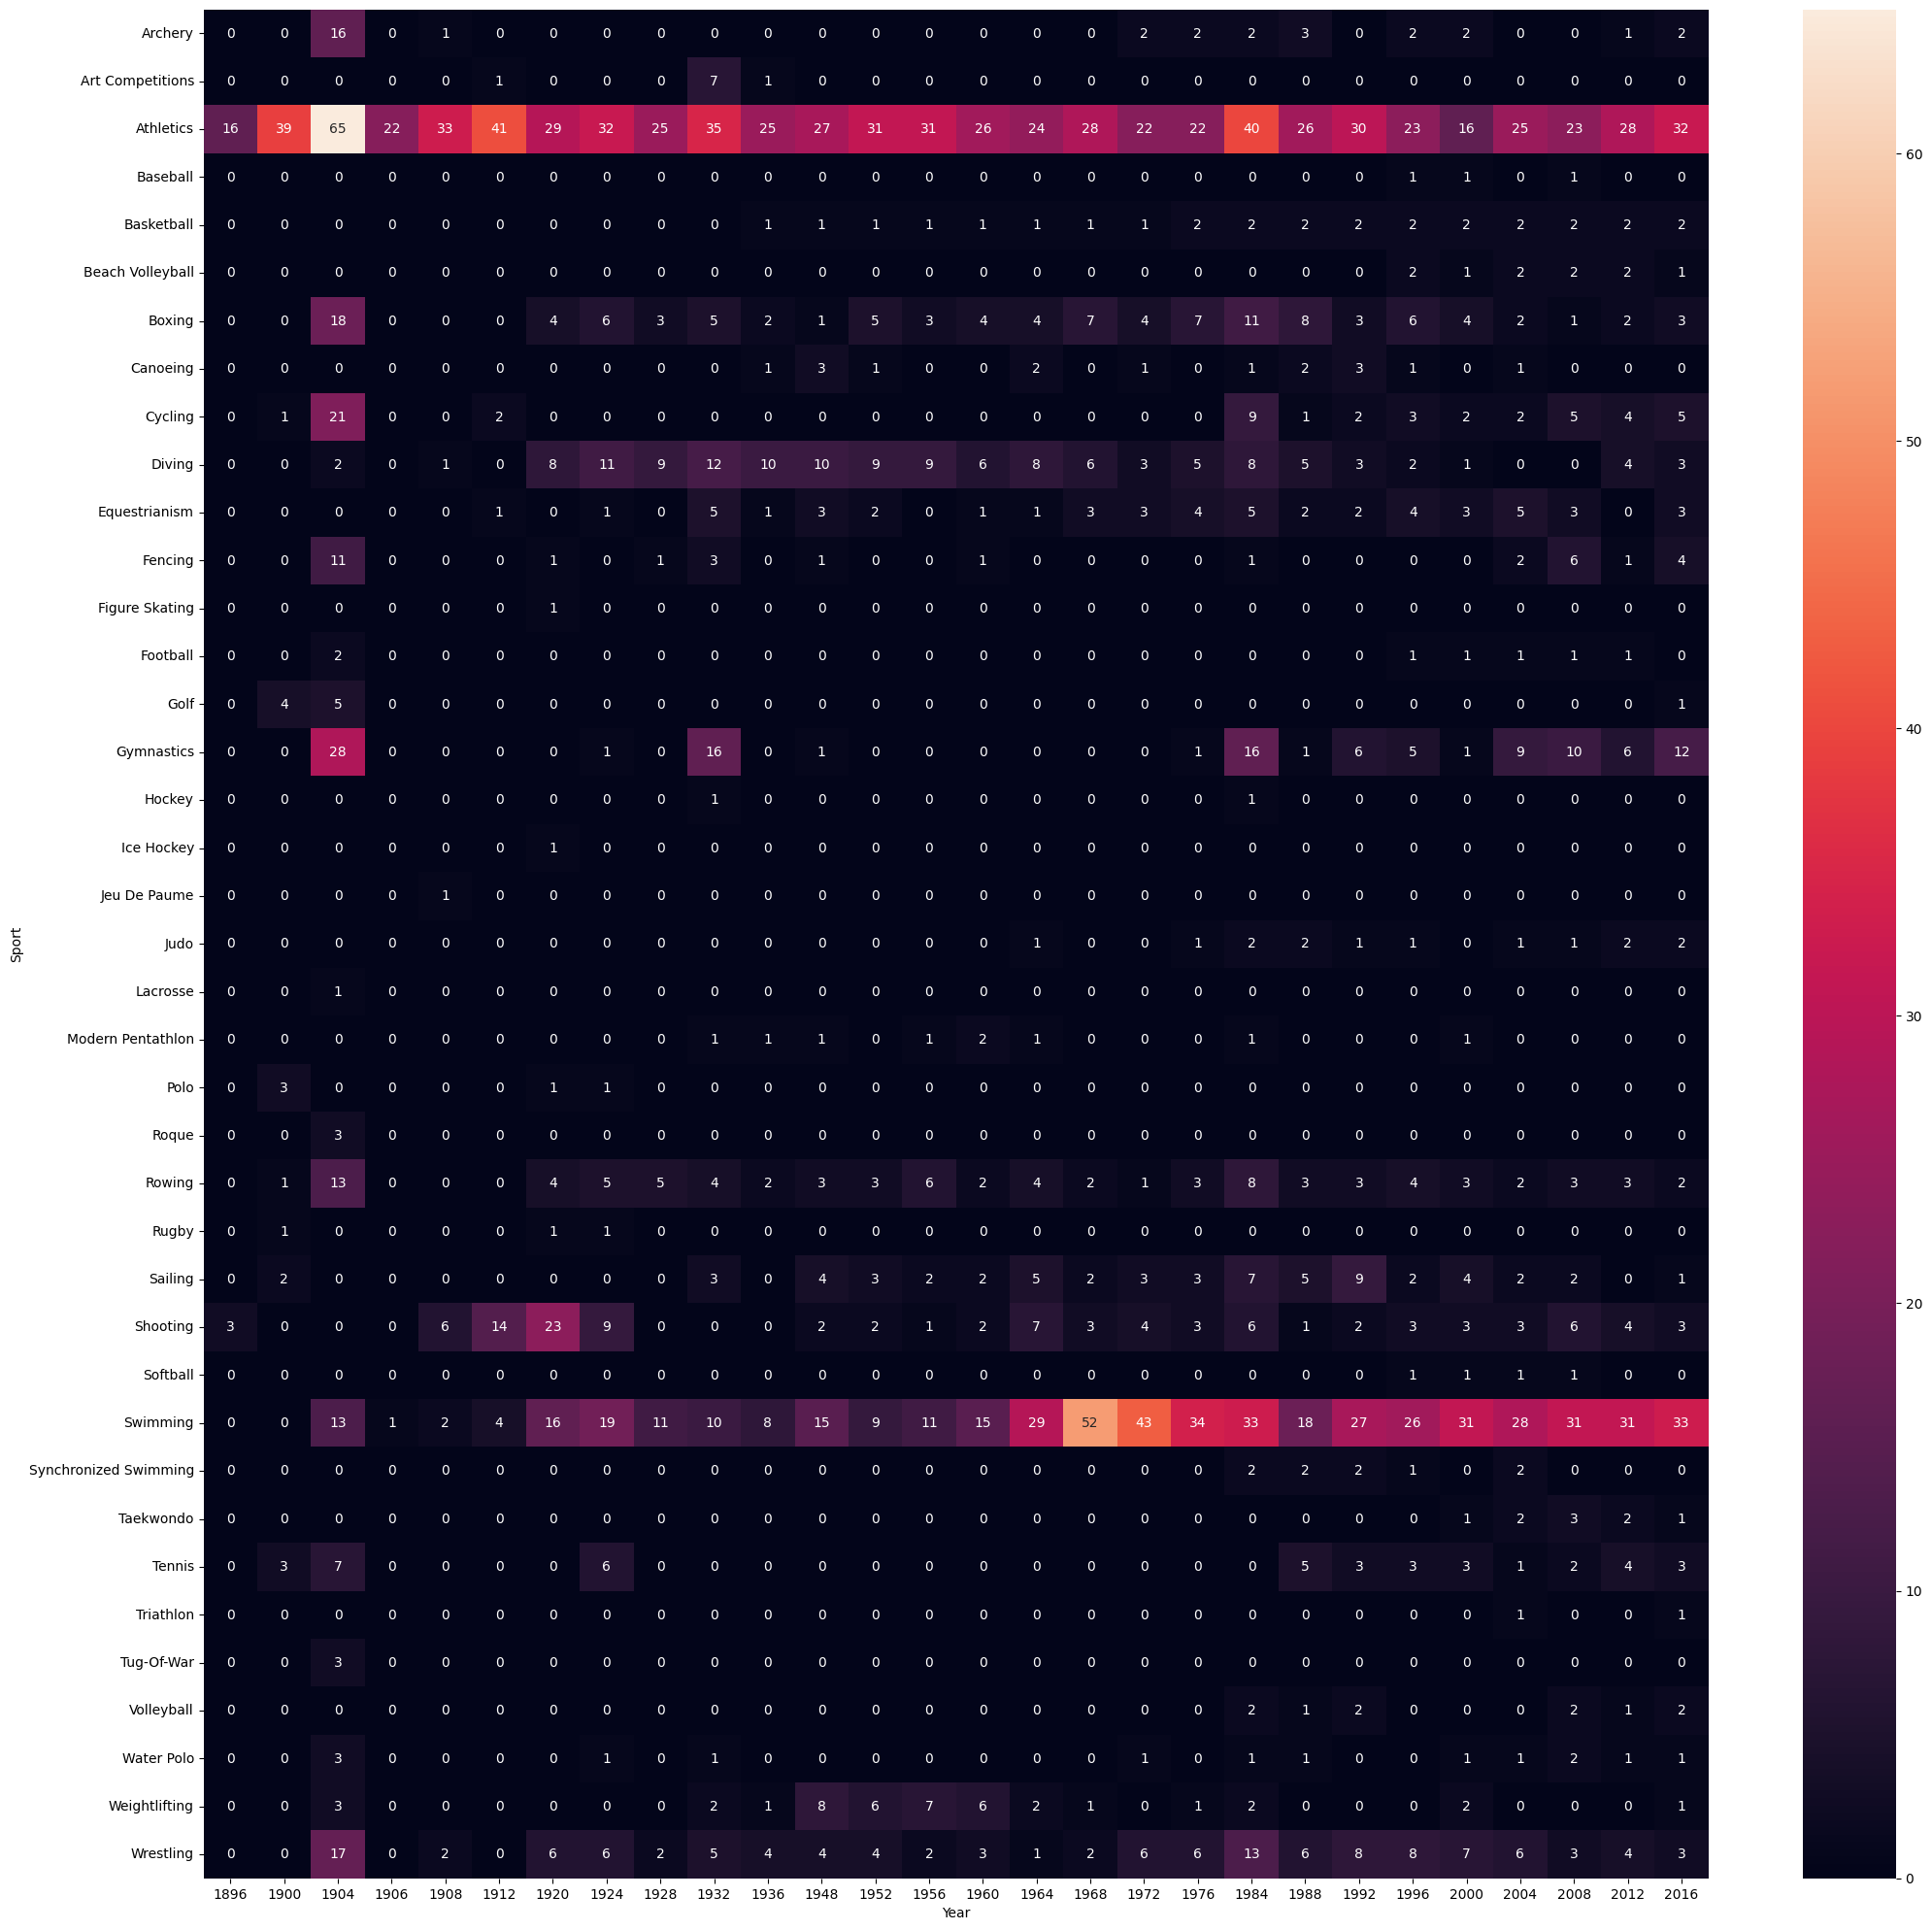

In [ ]:
plt.figure(figsize = (25,25))
new_df = temp_df[temp_df['region'] == 'USA']
sb.heatmap(new_df.pivot_table(index = 'Sport', columns = 'Year', values = 'Medal', aggfunc='count').fillna(0), annot = True)

In [ ]:
def most_successful_athetes(df, country):
  temp_df = df.dropna(subset=['Medal'])
  if country != 'Overall':
    temp_df = temp_df[temp_df['region'] == country]
  x = temp_df['Name'].value_counts().reset_index().head(10).merge(df, left_on = 'Name', right_on = 'Name', how = 'left')[['Name', 'count', 'Sport']].drop_duplicates('Name')
  x.rename(columns= {'count':'Medals'}, inplace= True)
  return x

In [ ]:
most_successful_athetes(df, 'India')

,Name,Medals,Sport
0,Leslie Walter Claudius,4,Hockey
4,Udham Singh Kular,4,Hockey
8,"Victor John ""V. J."" Peter",3,Hockey
11,Dhyan Chand Bais,3,Hockey
14,Richard James Allen,3,Hockey
17,Shankar Pillay Laxman,3,Hockey
20,Balbir Singh,3,Hockey
23,Harbinder Singh Chimni,3,Hockey
26,Prithipal Singh,3,Hockey
29,Ranganathan Francis,3,Hockey


In [ ]:
import plotly.figure_factory as ff

In [ ]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])


In [ ]:
df['Medal'].value_counts()

,count
Medal,
Gold,11456
Bronze,11409
Silver,11212


In [ ]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()

In [ ]:
# x1

In [ ]:
# athlete_df

In [ ]:
fig = ff.create_distplot([x1, x2, x3, x4],["Age Distribution", "Gold Medalist", "Silver Medalist", "Bronze Medalist"], show_hist=False, show_rug=False)

In [ ]:
fig.show()

In [ ]:
sports = df['Sport'].value_counts().index.tolist()

In [ ]:
sports

['Athletics',
 'Gymnastics',
 'Swimming',
 'Shooting',
 'Cycling',
 'Fencing',
 'Rowing',
 'Wrestling',
 'Football',
 'Sailing',
 'Equestrianism',
 'Canoeing',
 'Boxing',
 'Hockey',
 'Basketball',
 'Weightlifting',
 'Water Polo',
 'Judo',
 'Handball',
 'Volleyball',
 'Tennis',
 'Diving',
 'Archery',
 'Art Competitions',
 'Table Tennis',
 'Modern Pentathlon',
 'Badminton',
 'Synchronized Swimming',
 'Baseball',
 'Rhythmic Gymnastics',
 'Taekwondo',
 'Beach Volleyball',
 'Triathlon',
 'Softball',
 'Rugby Sevens',
 'Golf',
 'Tug-Of-War',
 'Rugby',
 'Trampolining',
 'Polo',
 'Lacrosse',
 'Ice Hockey',
 'Figure Skating',
 'Cricket',
 'Croquet',
 'Motorboating',
 'Racquets',
 'Jeu De Paume',
 'Roque',
 'Alpinism',
 'Basque Pelota',
 'Aeronautics']

In [ ]:
import plotly.figure_factory as ff

x = []
name = []

for sport in sports:
    temp_df = athlete_df[(athlete_df['Sport'] == sport) & (athlete_df['Medal'] == 'Gold')]
    ages = temp_df['Age'].dropna().tolist()

    if len(ages) > 1 and len(set(ages)) > 1:  # কমপক্ষে ২টি ভিন্ন value থাকা দরকার
        x.append(ages)
        name.append(sport)

if len(x) > 0:
    fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
    fig.show()
else:
    print("No sport has enough Gold medalists with variable ages for KDE plot.")


In [ ]:
athlete_df['Medal'].fillna('No Medal', inplace=True)

/tmp/ipython-input-2256303489.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





<Axes: xlabel='Weight', ylabel='Height'>

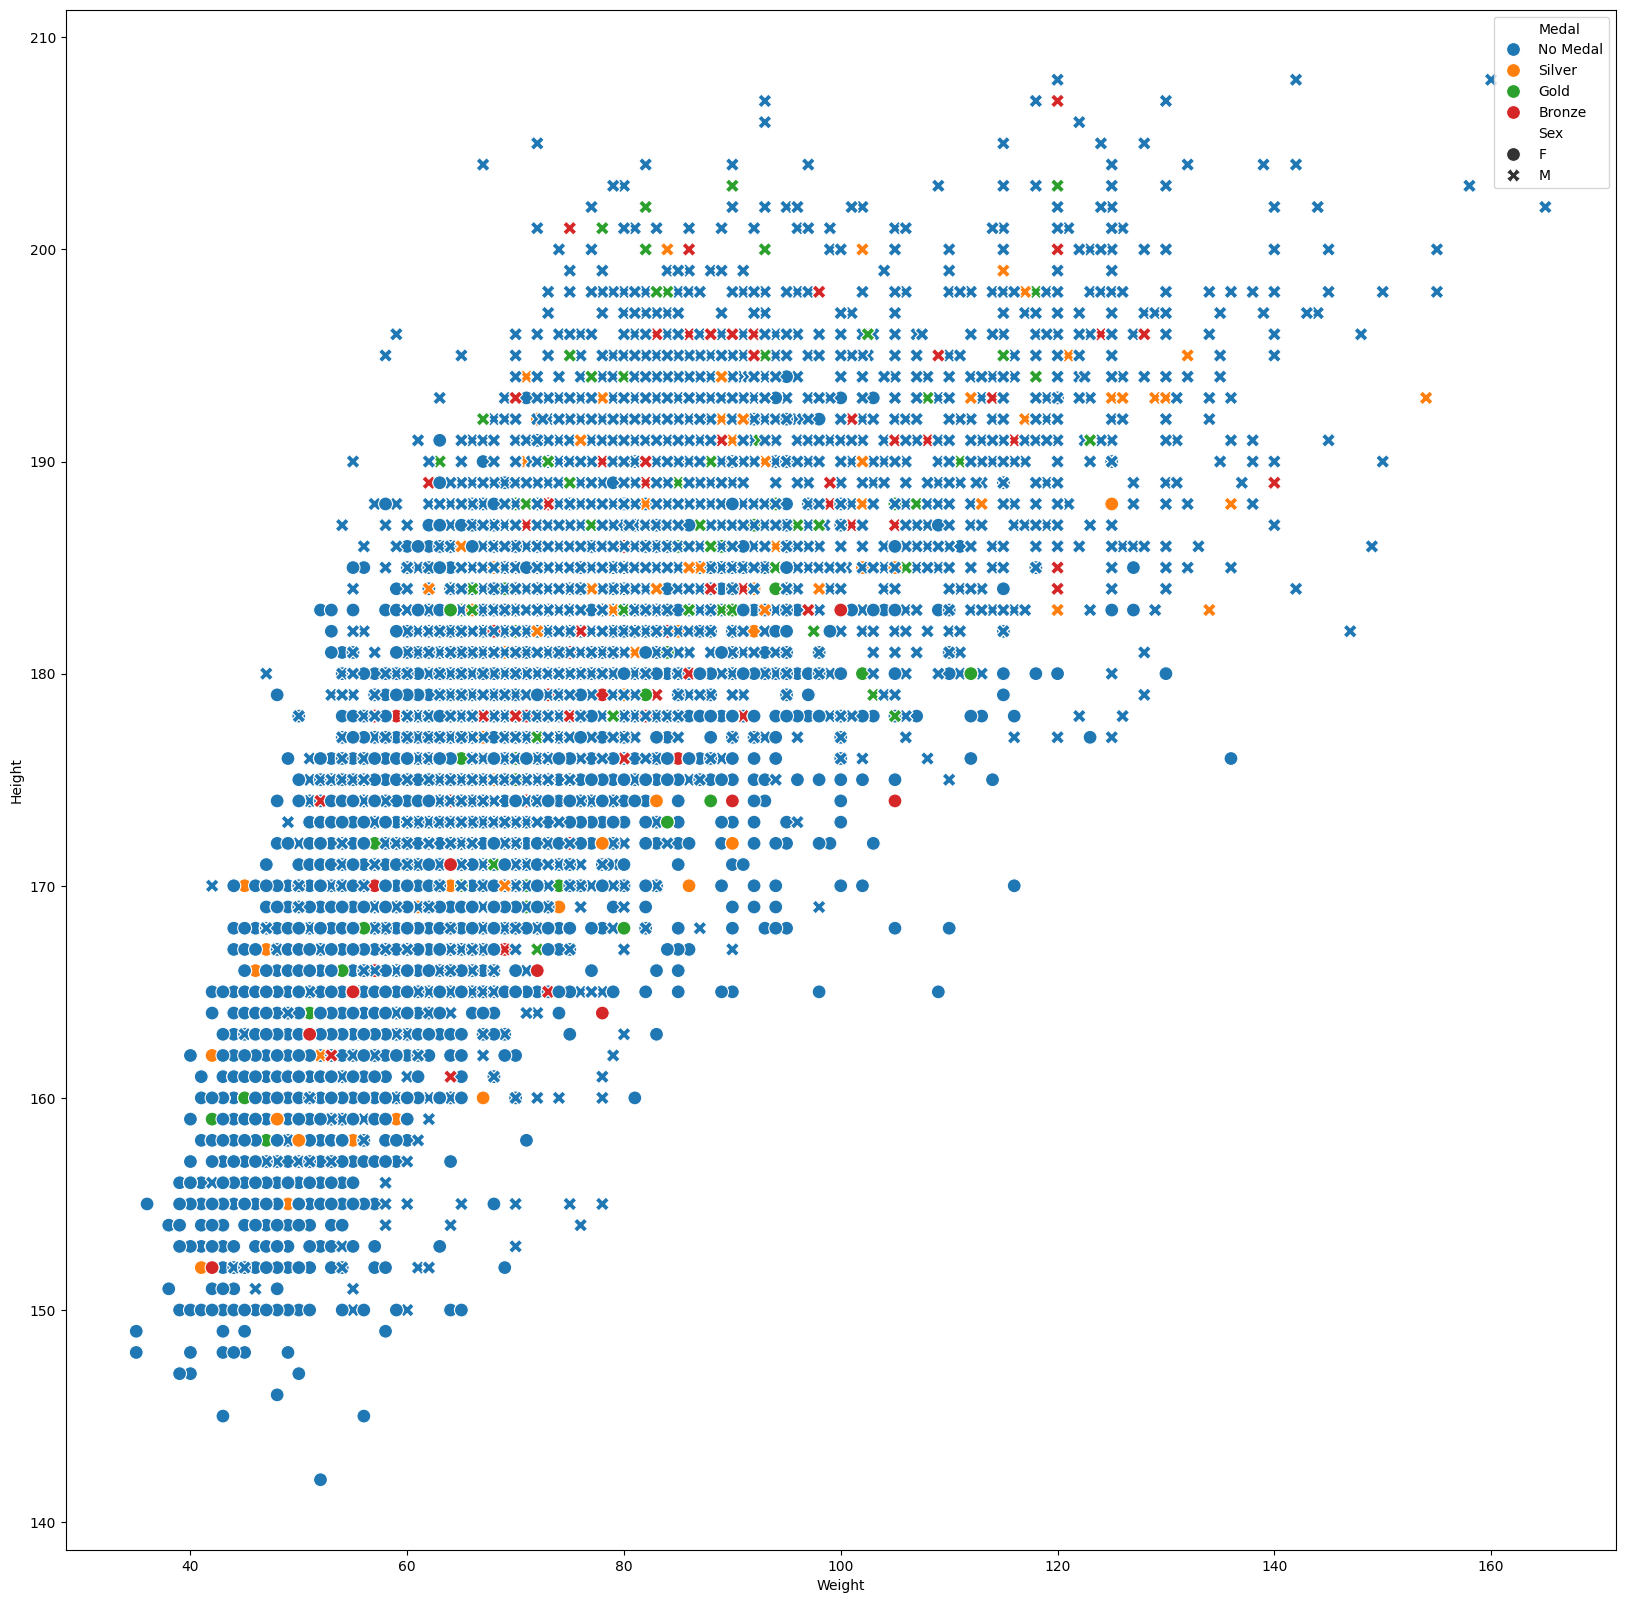

In [ ]:
import seaborn as sb
plt.figure(figsize=(20,20))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sb.scatterplot(data=temp_df, x='Weight', y='Height', hue='Medal',style=temp_df['Sex'], s = 100)


In [ ]:
men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [ ]:
men.head(3)

,Year,Name
0,1896,174
1,1900,1181
2,1904,629


In [ ]:
final = men.merge(women, on = 'Year', how= 'right')
final.rename(
    columns = {
        'Name_x': 'Male',
        'Name_y': 'Female'
    },
    inplace = True
)


In [ ]:
final.fillna(0, inplace=True)

In [ ]:
fig = px.line(final, x = 'Year', y = ['Male', 'Female'])
fig.show()